<a href="https://colab.research.google.com/github/daniela150803/LINEAR-REGRESSION/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [1]:
import tensorflow as tf
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



Lectura Data Set texto a numeros

In [2]:

data_set = '/content/Diagnostico(Datos).csv'

# Leer el archivo CSV
df = pd.read_csv(data_set, sep=';', decimal=',')
# Obtener información sobre los tipos de datos de cada columna
data_types = df.dtypes

# Imprimir los tipos de datos
data_types
df_sin_cabecera = df[1:]
for col in df_sin_cabecera.columns:
    if pd.api.types.is_object_dtype(df_sin_cabecera[col]):
        texto=col
if texto:
    df[texto] = df[texto].replace({'MASCULINO': 1, 'FEMENINO': 2})

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())

   EDAD  GENERO  ESTATURA  PESO  PRESION_SANG  RESULTADO1  RESULTADO2  \
0    19       1       181  62.9          87.0          90        57.0   
1    19       1       173  75.7          83.0          84        46.0   
2    19       1       184  78.5          75.0          72        52.0   
3    20       1       151  52.2          87.0          85        53.0   
4    20       2       155  53.1          87.0          78        58.0   

   RESULTADO3  RESULTADO4  RESULTADO5  RESULTADO6  EVOLUCION  
0         124      4.1744        54.0         2.0       1.37  
1         225      4.7185       156.6         5.0       2.00  
2         143      4.6347        70.4         3.0       1.40  
3         191      3.8918       128.2         4.0       1.13  
4         171      4.2047        99.6         3.0       0.77  


<ipython-input-2-eb35e5e7ef66>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[texto] = df[texto].replace({'MASCULINO': 1, 'FEMENINO': 2})


Convertir en un Tensor

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Convertir el DataFrame a un array de NumPy
data_array = df.to_numpy()

# Separar características (X) y etiquetas (y)
X = data_array[:, :-1]  # Todas las columnas excepto la última
y = data_array[:, -1]   # La última columna es la etiqueta

# Convertir a tensores de TensorFlow
X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)



Distribucion 80/20

In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
total_filas = X_tensor.shape[0]
indice_separacion = int(round(0.8 * total_filas))

X_entrenamiento = X_tensor[:indice_separacion]
y_entrenamiento = y_tensor[:indice_separacion]

X_prueba = X_tensor[indice_separacion:]
y_prueba = y_tensor[indice_separacion:]

# Imprimir la forma de los conjuntos de datos resultantes
print("Forma del conjunto de entrenamiento:", X_entrenamiento.shape)
print("Forma del conjunto de prueba:", X_prueba.shape)


Forma del conjunto de entrenamiento: (354, 11)
Forma del conjunto de prueba: (88, 11)


Lote de entrenamiento

In [5]:
batch =1
epocas=100

Inicializacion de parametros

In [6]:

# Inicializar los pesos (w) con una distribución normal
ini_w =tf.keras.initializers.HeNormal()

# Inicializar los sesgos (b) con ceros
ini_b =tf.keras.initializers.Zeros()

Modelo

In [7]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(
        units=1,  # Una neurona (salida)
        input_shape=(X_entrenamiento.shape[1],),  # Forma de entrada (número de características)
        kernel_initializer=ini_w,  # Inicializador para los pesos
        bias_initializer=ini_b  # Inicializador para los sesgos
    )
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Funcion  de perdida

In [8]:
loss_fn=tf.keras.losses.LogCosh(
    reduction='sum_over_batch_size', name='log_cosh'
)

Algoritmo de Optimizacion


In [9]:

# Algoritmo de Optimizacion
optimizador = tf.keras.optimizers.Adam(learning_rate=0.003) # hiperparametros tasa de aprendizaje

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=loss_fn, metrics=['mae'])


Entrenamiento

In [10]:
# Entrenamiento
history = modelo.fit(X_entrenamiento,
                     y_entrenamiento, epochs=epocas,
                     batch_size=batch,
                     validation_data=(X_prueba, y_prueba))

Epoch 1/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.6168 - mae: 16.2946 - val_loss: 15.1837 - val_mae: 15.8582
Epoch 2/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.3209 - mae: 10.9862 - val_loss: 9.3584 - val_mae: 10.0341
Epoch 3/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.4473 - mae: 8.1090 - val_loss: 8.5454 - val_mae: 9.2273
Epoch 4/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8754 - mae: 5.5292 - val_loss: 8.7519 - val_mae: 9.4440
Epoch 5/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5697 - mae: 4.1864 - val_loss: 5.6454 - val_mae: 6.3375
Epoch 6/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0546 - mae: 2.6454 - val_loss: 2.5557 - val_mae: 3.2129
Epoch 7/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3560 - mae: 1.9121 - val_loss: 0.4977 - val_mae: 0.9184
Epoch 8/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9861 - mae: 1.5357 - val_loss: 1.2303 - val_mae: 1.8326
Epoch 9/100
354/354 ━━━━━━━━━━━━━━━━━━━━ 

Evaluar perdida

Pérdida en el conjunto de entrenamiento: 0.1553


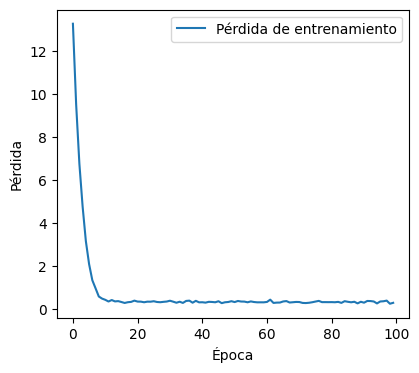

In [11]:
# Evaluar el modelo
loss, mae = modelo.evaluate(X_entrenamiento, y_entrenamiento, verbose=0)
print(f"Pérdida en el conjunto de entrenamiento: {loss:.4f}")

# Gráficas de pérdida y precisión
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

